<a href="https://colab.research.google.com/github/fourmodern/toc_tutorial_colab/blob/main/teachopencadd/t022_talktorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# T022 · Ligand-based screening: neural networks

Developed in the CADD seminar 2020, Volkamer Lab, Charité/FU Berlin

**Note:** This talktorial is a part of TeachOpenCADD, a platform that aims to teach domain-specific skills and to provide pipeline templates as starting points for research projects.

Authors:

- Ahmed Atta, CADD Seminar 2020, Charité/FU Berlin
- Sakshi Misra, internship (2020/21), [Volkamer lab](https://volkamerlab.org), Charité
- Talia B. Kimber, 2020/21, [Volkamer lab](https://volkamerlab.org), Charité
- Andrea Volkamer, 2021, [Volkamer lab](https://volkamerlab.org), Charité

## Aim of this talktorial

In recent years, the use of machine learning, and deep learning, in pharmaceutical research has shown promising results in addressing diverse problems in drug discovery. In this talktorial, we get familiar with the basics of neural networks. We will learn how to build a simple two layer neural network and train it on a subset of ChEMBL data in order to predict the pIC50 values of compounds against EGFR, the target of interest. Furthermore, we select three compounds from an external, unlabeled data set that are predicted to be the most active against that kinase.

### Contents in *Theory*

- Biological background
    - EGFR kinase
    - Compound activity measures
    - Molecule encoding
- Neural networks
    - What is a neural network?
    - Activation function
    - Loss function
- Training a neural network
- Keras workflow
- Advantages and applications of neural networks

### Contents in *Practical*

- Data preparation
- Define neural network
- Train the model
- Evaluation & prediction on test set
    - Scatter plot
- Prediction on external/unlabeled data
    - Select the top 3 compounds

### References

 - Theoretical background:
     - Articles    
         - Siddharth Sharma, "Activation functions in neural networks". [_International Journal of Engineering Applied Sciences and Technology, 2020_ **Vol. 4, Issue 12,** 310-316 (2020).](https://www.ijeast.com/papers/310-316,Tesma412,IJEAST.pdf)
         - Shun-ichi Amari, "Backpropagation and stochastic gradient descent method", [*ScienceDirect  **Volume 5, Issue 4-5**, 185-196*](https://doi.org/10.1016/0925-2312(93)90006-O)
         - Gisbert Schneider et al., "Artificial neural networks for computer-based molecular design", [*ScienceDirect **Volume 70, Issue 3**, 175-222*](https://doi.org/10.1016/S0079-6107(98)00026-1)
         - Filippo Amato et al., "Artificial neural networks in medical diagnosis", [*ScienceDirect  **Volume 11, Issue 2**, 47-58*](https://doi.org/10.2478/v10136-012-0031-x)         
         
     - Blogposts
          - Imad Dabbura, *Coding Neural Network — Forward Propagation and Backpropagtion*, [towardsdatascience, accessed April 1st, 2018](https://towardsdatascience.com/coding-neural-network-forward-propagation-and-backpropagtion-ccf8cf369f76).
          - Lavanya Shukla, *Designing Your Neural Networks*, [towardsdatascience, accessed Sep 23rd, 2019](https://towardsdatascience.com/designing-your-neural-networks-a5e4617027ed)
          - Arthur Arnx, *First neural network for beginners explained (with code)*, [towardsdatascience, accessed Jan 13th, 2019](https://towardsdatascience.com/first-neural-network-for-beginners-explained-with-code-4cfd37e06eaf)
          - Varun Divakar, *Understanding Backpropagation*, [QuantInst, accessed Nov 19th, 2018](https://blog.quantinsti.com/backpropagation/)
               
- Packages:
     - [rdkit](http://rdkit.org/): Greg Landrum, *RDKit Documentation*, [PDF](https://www.rdkit.org/UGM/2012/Landrum_RDKit_UGM.Fingerprints.Final.pptx.pdf), Release on 2019.09.1.
     - [Keras](https://keras.io/): Book chapter: "An Introduction to Deep Learning and Keras" in [*Learn Keras for Deep Neural Networks* (2019), **page(s):1-16**](https://doi.org/10.1007/978-1-4842-4240-7).
     - [Sequential model](https://keras.io/api/models/sequential/) in keras
     - [Model training APIs](https://keras.io/api/models/model_training_apis/#model-training-apis)

## Theory

### Biological background

#### EGFR kinase

- The [Epidermal Growth Factor Receptor (EGFR)](https://en.wikipedia.org/wiki/Epidermal_growth_factor_receptor) is a transmembrane protein/receptor present on the cell membrane. It is a member of the ErbB family of receptors.
- EGFR plays an important role in controlling normal cell growth, apoptosis and other cellular functions.
- It is activated by ligand binding to its extracellular domain, upon activation EGFR undergoes a transition from an inactive monomeric form to an active homodimers.
- The EGFR receptor is upregulated in various types of tumors or cancers, so an EGFR inhibition is a type of biological therapy that might stop cancer cells from growing.

#### Compound activity measures

- **IC50** is the half maximal inhibitory concentration of a drug which indicates how much of a drug is needed to inhibit a biological process by half.
- **pIC50** is the negative logarithm of the IC50 value. It is more easily interpretable than IC50 values and a common measure for potency of compounds (see **Talktorial T001** for further details).

#### Molecule encoding

For machine learning algorithms, molecules need to be converted into a machine readable format, e.g. a list of features. In this notebook, molecular fingerprints are used.

Molecular fingerprints encode chemical structures and molecular features in a bit string, where at each position "1" represents the presence and "0" represents the absence of a feature. One of the common fingerprints used are **M**olecular **ACC**ess **S**ystem fingerprints [(MACCS Keys)](https://docs.eyesopen.com/toolkits/python/graphsimtk/fingerprint.html#maccs) which are 166 bits structural key descriptors in which each bit is associated with a [SMARTS](https://docs.eyesopen.com/toolkits/python/oechemtk/glossary.html#term-smarts) pattern encoding a specific substructure (see **Talktorial T004** for further details).

### Neural networks

#### What is a neural network?

Neural networks, also known as artificial neural networks (ANNs), are a subset of machine learning algorithms. The structure and the name of the neural network is inspired by the human brain, mimicking the way that biological neurons transfer signals to one another.

![Basic structure](https://github.com/volkamerlab/teachopencadd/blob/master/teachopencadd/talktorials/T022_ligand_based_screening_neural_network/images/basic_structure.png?raw=1)

*Figure 1:* The figure shows the basic structure of an artificial neural network. It is taken from the blogpost: "*Designing Your Neural Networks*", Lavanya Shukla, [towardsdatascience](https://towardsdatascience.com/designing-your-neural-networks-a5e4617027ed).

ANNs consist of three main layers as shown in the figure above: the _input layer_, some _hidden layers_ and the _output layer_. Let's take a deeper look at each of them.

1. **Input neurons or input layer**
   - This layer represents the number of features which are used to make the predictions.
   - The input vector needs one input neuron per feature.
2. **Hidden layers and neurons per hidden layer**
    - The dimension of the hidden layers may vary greatly, but a good rule of thumb is to have dimensions in the range of the input layer and the output layer.
    - In general, using the same number of neurons for all hidden layers will suffice but for some datasets, having a large first layer and following it up with smaller layers may lead to a better performance as first layers can learn many low-level features.
3. **Output neurons or output layer**
    - The output layer represents the value of interest, which will be predicted by the neural network.
        - Regression task: the value is a real number (or vector) such as the pIC50 value.
        - Binary classification task: the output neuron represents the probability of belonging to the positive class.
        - Multi-class classification task: there is one output neuron per class and the predictions represent the probability of belonging to each class. A certain activation function is applied on the output layer to ensure the final probabilities sum up to 1.

**Neurons** are the core units of a neural network. Let's look into the operations done by each neuron to understand the overall mechanism of a neural network.

![Neuron](https://github.com/volkamerlab/teachopencadd/blob/master/teachopencadd/talktorials/T022_ligand_based_screening_neural_network/images/neuron.png?raw=1)

*Figure 2:* Operations done by a neuron. The figure is taken from the blogpost: "*First neural network for beginners explained (with code)*", Arthur Arnx, [towardsdatascience](https://towardsdatascience.com/first-neural-network-for-beginners-explained-with-code-4cfd37e06eaf).

Each input neuron $x_i$ is multiplied by a weight $w_i$. In Figure 2, we have $(x1, x2, x3)$ and  $(w1, w2, w3)$. The value of a weight determines the influence that the input neuron will have on the neuron of the next layer. The multiplied values are then summed. An additional value, called bias, is also added and allows to shift the activation function. This new value becomes the value of the hidden neuron. Mathematically, we have:

$$ h = (w1*x1 + w2*x2 + w3*x3) + b = \sum_i ^ 3w_i*x_i+ b $$

An activation function, discussed in greater details in the next section, is then applied to the hidden neuron to determine if the neuronal value should be activated or not. An activated neuron transmits data to the neuron of the next layer. In this manner, the data is propagated through the network which is known as [forward propagation](https://en.wikipedia.org/wiki/Feedforward_neural_network).

The weights and biases in a neural network are referred to as _learnable parameters_. They are tuned when training the model to obtain a good performance.



#### Activation function

**What is an activation function?**

An [activation function](https://en.wikipedia.org/wiki/Activation_function) regulates the amount of information passed through a neural network. This function is applied to each neuron and determines whether the neuron should be activated or not. It works as a "gate" between the input feeding the current neuron and its output going to the next layer as shown in the figure below.

![Activation](https://github.com/volkamerlab/teachopencadd/blob/master/teachopencadd/talktorials/T022_ligand_based_screening_neural_network/images/activation.png?raw=1)

*Figure 3:* The figure shows an activation function applied on a neuron. It is taken from the blogpost: [Why Activation Functions?](https://medium.com/analytics-vidhya/why-activation-functions-8328f3f21120)

**Types of activation function**

There are many types of activation functions, but we only discuss the two which we use in the practical section below. For more information, see the supplementary section and references. Most neural networks use non-linear activation functions in the hidden layers to learn complex features and adapt to a variety of data.

1. Rectified Linear Unit (ReLU)

- It takes the form: $\boxed{f(x) = max\{ 0, x\}}$.
- As shown in the figure below, [ReLU](https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/) outputs $x$, if $x$ is positive and $0$ otherwise. The range of ReLU is $[0, +\infty)$.
- One of the reasons it is commonly used is its sparsity: only few neurons will be activated and thereby making the activations sparse and efficient.
- It has become the default activation function for many types of neural networks because it makes the training of a model less expensive and the model often achieves better performance.
- A possible drawback of ReLU is the so-called _dying ReLU problem_ where neurons get stuck as inactive for all inputs, it is a form of [vanishing gradient problem](https://en.wikipedia.org/wiki/Vanishing_gradient_problem).

![ReLU](https://github.com/volkamerlab/teachopencadd/blob/master/teachopencadd/talktorials/T022_ligand_based_screening_neural_network/images/relu.png?raw=1)

*Figure 4:* Representation of the *ReLU* function. Figure by Sakshi Misra.

2. Linear activation function

- A [linear activation function](https://keras.io/api/layers/core_layers/dense/) takes the form: $\boxed{a(x) = x}$.
- It is the most appropriate activation function in a regression setting, since there is no constraint on the output.

#### Loss function


When training a neural network, the aim is to optimize the prediction error, i.e. the difference between the true value and the value predicted by the model. The prediction error can be written as a function, known as the objective function, cost function, or **loss function**. The goal is therefore to minimize the loss function, in other words, to find local minima. The loss function is one of the important components in training a neural network. For more details on loss functions, please refer to the blogpost: [Loss and Loss Functions for Training Deep Learning Neural Networks](https://machinelearningmastery.com/loss-and-loss-functions-for-training-deep-learning-neural-networks/).
Two commonly used loss functions in regression tasks are

1. the **Mean Squared Error (MSE)**: As the name suggests, this loss is calculated by taking the mean of the squared differences between the true and predicted values.
2. the **Mean Absolute Error (MAE)**: The loss is calculated by taking the mean of the absolute difference between the true and predicted values.

### Training a neural network

When starting with a neural network, the parameters, i.e. the weights and biases, are randomly initialized. The inputs are then fed into the network and produce an output. However, the corresponding output will most likely be very different from the true value. In other words, the prediction error will be very poor: the loss function is far from being minimal. Therefore, the initial parameters have to be optimized to obtain better predictions.

To this end, we need to minimize the loss function. An efficient way to find such a minimum is to use the [gradient descent](https://en.wikipedia.org/wiki/Gradient_descent#:~:text=Gradient%20descent%20is%20a%20first,the%20direction%20of%20steepest%20descent.) algorithm. This optimization scheme is iterative and uses both the derivative of the loss function (or gradient in the multivariate case) and a learning rate. The main idea behind the algorithm is to follow the steepest direction of the function, obtained with the gradient and managing the length of each step with the learning rate. The latter is often referred to as a hyperparameter, which can be tuned using cross-validation (more details in future talktorials).

In training neural networks, it is very common to use _back-propagation_, which is a way of efficiently obtaining the gradients using the chain-rule for differentiation.

In summary, after each forward pass through a network, back-propagation performs a backward pass while adjusting the model’s parameters in order to minimize the loss function.

**Computation cost**

If the data set used is very large, computing the gradient of the loss function can be very expensive. A way to solve this issue is to use instead a sample, or mini-batch, of the training data at a time, known as [_Stochastic Gradient Descent (SGD)_](https://en.wikipedia.org/wiki/Stochastic_gradient_descent) or _Mini-Batch Stochastic Gradient Descent_.

### Keras workflow

[Keras](https://keras.io/getting_started/) is an open-source library for machine learning and more specifically neural networks. Its API runs on top of the very well-known [tensorflow](https://www.tensorflow.org/) deep learning platform.

Below, we present a common workflow for training a neural network with [keras](https://keras.io/getting_started/).


- **Prepare the data** − Foremost for any machine learning algorithm, we process, filter and select only the required information from the data. Then, the data is split into training and test data sets. The test data is used to evaluate the prediction of the algorithm and to cross check the efficiency of the learning process.


- **Define the model** - In keras, every ANN is represented by keras [models](https://keras.io/api/models/model/#model-class). Keras provides a way to create a model which is called [sequential](https://keras.io/api/models/sequential/). The layers are arranged sequentially where the data flows from one layer to another layer in a given order until the data finally reaches the output layer. Each layer in the ANN can be represented by a *keras layer*.


- **Compile the model** − The compilation is the final step in creating a model. Once the compilation is done, we can move on to the training phase. A _loss function_ and an _optimizer_ are required in the learning phase to define the prediction error and to minimize it, respectively. In the practical part of this talktorial, we use the mean squared error as a loss and the [adam](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/) optimizer, which is a popular version of gradient descent and has shown to give good results in a wide range of problems.

- **Fit the model** - The actual learning process will be done in this phase using the training data set. We can call the [fit()](https://keras.io/api/models/model_training_apis/#fit-method) method which needs several parameters such as $x$ the input data, $y$ the target data, the batch size, the number of epochs, etc. An _epoch_ is when the entire dataset is passed forward and backward through the neural network once.

- **Evaluate model** − We can evaluate the model by looking at the loss function between the predicted and true values of the test data using the [evaluate()](https://keras.io/api/models/model_training_apis/#evaluate-method) method.

    - Scatter plots are a common and simple approach to visualize the evaluation of a model. They plot the predicted vs. true values. If the fit was perfect, we should see the $y=x$ line, meaning that the predicted value is exactly the true value.
    
    
- **Predictions on external/unlabeled data** − We make predictions based on the trained model for the external data set using the [predict()](https://keras.io/api/models/model_training_apis/#predict-method) method.

### Advantages and applications of neural networks

**Advantages of a neural network**

- **Organic learning**: Neural networks have the ability to learn by extracting the important features present in the input data.
- **Non linear data processing**: They have the ability to learn and model non-linear and complex relationships.
- **Time operation**: The computation cost during training time can be reduced using parallelization.

To learn more about advantages and disadvantages of a neural network, please refer to the article: J V Tu, "*Advantages and disadvantages of using artificial neural networks versus logistic regression for predicting medical outcomes*", [Journal of Clinical Epidemiology, **vol 49 issue 11**, pages: 1225-1231](https://pubmed.ncbi.nlm.nih.gov/8892489/).

**Applications of neural networks**

There are various applications of neural networks in computer-aided drug design  such as:

- Drug design and discovery
- Biomarker identification and/or classification
- Various types of cancer detection
- Pattern recognition

Please refer to the article: Cheirdaris D.G. (2020), "*Artificial Neural Networks in Computer-Aided Drug Design: An Overview of Recent Advances*",  [GeNeDis 2018. Advances in Experimental Medicine and Biology, **vol 1194**. Springer](https://link.springer.com/chapter/10.1007/978-3-030-32622-7_10) for more details.

## Practical

The first step is to import all the necessary libraries.

In [1]:
!pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.1/33.1 MB 54.6 MB/s eta 0:00:00


In [2]:
from pathlib import Path
from warnings import filterwarnings

# Silence some expected warnings
filterwarnings("ignore")

import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import MACCSkeys, Draw, rdFingerprintGenerator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns

# Neural network specific libraries
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint

%matplotlib inline

In [3]:
# Set path to this notebook
HERE = Path(_dh[-1])
DATA = HERE / "data"

### Data preparation

Let's load the data which is a subset of ChEMBL for EGFR. The important columns in the dataframe are:

- CHEMBL-ID
- SMILES string of the corresponding compound
- Measured affinity: pIC50

In [4]:
!wget https://github.com/volkamerlab/teachopencadd/raw/refs/heads/master/teachopencadd/talktorials/T022_ligand_based_screening_neural_network/data/CHEMBL25_activities_EGFR.csv
# Load data
df = pd.read_csv("CHEMBL25_activities_EGFR.csv", index_col=0)
df = df.reset_index(drop=True)

--2024-09-20 11:02:30--  https://github.com/volkamerlab/teachopencadd/raw/refs/heads/master/teachopencadd/talktorials/T022_ligand_based_screening_neural_network/data/CHEMBL25_activities_EGFR.csv
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/volkamerlab/teachopencadd/refs/heads/master/teachopencadd/talktorials/T022_ligand_based_screening_neural_network/data/CHEMBL25_activities_EGFR.csv [following]
--2024-09-20 11:02:30--  https://raw.githubusercontent.com/volkamerlab/teachopencadd/refs/heads/master/teachopencadd/talktorials/T022_ligand_based_screening_neural_network/data/CHEMBL25_activities_EGFR.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connecte

In [5]:
# Check the dimension and missing value of the data
print("Shape of dataframe : ", df.shape)
df.info()

Shape of dataframe :  (3906, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3906 entries, 0 to 3905
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   chembl_id         3906 non-null   object 
 1   IC50              3906 non-null   float64
 2   units             3906 non-null   object 
 3   canonical_smiles  3906 non-null   object 
 4   pIC50             3906 non-null   float64
dtypes: float64(2), object(3)
memory usage: 152.7+ KB


In [6]:
# Look at head
df.head()
# NBVAL_CHECK_OUTPUT

,chembl_id,IC50,units,canonical_smiles,pIC50
0,CHEMBL207869,77.0,nM,Clc1c(OCc2cc(F)ccc2)ccc(Nc2c(C#Cc3ncccn3)cncn2)c1,7.113509
1,CHEMBL3940060,330.0,nM,ClCC(=O)OCCN1C(=O)Oc2c1cc1c(Nc3cc(Cl)c(F)cc3)n...,6.481486
2,CHEMBL3678951,1.0,nM,FC(F)(F)c1cc(Nc2n(C(C)C)c3nc(Nc4ccc(N5CC[NH+](...,9.000000
3,CHEMBL504034,40.0,nM,Clc1c(OCc2cc(F)ccc2)ccc(Nc2ncnc3c2sc(C#C[C@H]2...,7.397940
4,CHEMBL158797,43000.0,nM,S(Sc1n(C)c2c(c1C(=O)NCC(O)CO)cccc2)c1n(C)c2c(c...,4.366531


In [7]:
# Keep necessary columns
chembl_df = df[["canonical_smiles", "pIC50"]]
chembl_df.head()
# NBVAL_CHECK_OUTPUT

,canonical_smiles,pIC50
0,Clc1c(OCc2cc(F)ccc2)ccc(Nc2c(C#Cc3ncccn3)cncn2)c1,7.113509
1,ClCC(=O)OCCN1C(=O)Oc2c1cc1c(Nc3cc(Cl)c(F)cc3)n...,6.481486
2,FC(F)(F)c1cc(Nc2n(C(C)C)c3nc(Nc4ccc(N5CC[NH+](...,9.000000
3,Clc1c(OCc2cc(F)ccc2)ccc(Nc2ncnc3c2sc(C#C[C@H]2...,7.397940
4,S(Sc1n(C)c2c(c1C(=O)NCC(O)CO)cccc2)c1n(C)c2c(c...,4.366531


**Molecular encoding**

We convert the SMILES string to numerical data to apply a neural network. We use the already defined function `smiles_to_fp` from **Talktorial T007** which generates fingerprints from SMILES.
The default encoding are MACCS keys with 166 bits (see **Talktorial T007** for more information on molecular encoding).

In [8]:
def smiles_to_fp(smiles, method="maccs", n_bits=2048):
    """
    Encode a molecule from a SMILES string into a fingerprint.

    Parameters
    ----------
    smiles : str
        The SMILES string defining the molecule.

    method : str
        The type of fingerprint to use. Default is MACCS keys.

    n_bits : int
        The length of the fingerprint.

    Returns
    -------
    array
        The fingerprint array.
    """

    # Convert smiles to RDKit mol object
    mol = Chem.MolFromSmiles(smiles)

    if method == "maccs":
        return np.array(MACCSkeys.GenMACCSKeys(mol))
    if method == "morgan2":
        fpg = rdFingerprintGenerator.GetMorganGenerator(radius=2, fpSize=n_bits)
        return np.array(fpg.GetCountFingerprint(mol))
    if method == "morgan3":
        fpg = rdFingerprintGenerator.GetMorganGenerator(radius=3, fpSize=n_bits)
        return np.array(fpg.GetCountFingerprint(mol))
    else:
        print(f"Warning: Wrong method specified: {method}." " Default will be used instead.")
        return np.array(MACCSkeys.GenMACCSKeys(mol))

Convert all SMILES strings to MACCS fingerprints.

In [9]:
chembl_df["fingerprints_df"] = chembl_df["canonical_smiles"].apply(smiles_to_fp)

# Look at head
print("Shape of dataframe:", chembl_df.shape)
chembl_df.head(3)
# NBVAL_CHECK_OUTPUT

Shape of dataframe: (3906, 3)


,canonical_smiles,pIC50,fingerprints_df
0,Clc1c(OCc2cc(F)ccc2)ccc(Nc2c(C#Cc3ncccn3)cncn2)c1,7.113509,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,ClCC(=O)OCCN1C(=O)Oc2c1cc1c(Nc3cc(Cl)c(F)cc3)n...,6.481486,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,FC(F)(F)c1cc(Nc2n(C(C)C)c3nc(Nc4ccc(N5CC[NH+](...,9.000000,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


Next, we define $x$, the **features**, and $y$, the **target data** which will be used to train the model. In our case, features are the bit vectors and the target values are the pIC50 values of the molecules.

We use `train_test_split` from the _scikit-learn_ library to split the data into 70% training and 30% test data.

In [10]:
# Split the data into training and test set
x_train, x_test, y_train, y_test = train_test_split(
    chembl_df["fingerprints_df"], chembl_df[["pIC50"]], test_size=0.3, random_state=42
)

# Print the shape of training and testing data
print("Shape of training data:", x_train.shape)
print("Shape of test data:", x_test.shape)
# NBVAL_CHECK_OUTPUT

Shape of training data: (2734,)
Shape of test data: (1172,)


### Define neural network

A keras model is defined by specifying the number of neurons in the hidden layers and the activation function as arguments. For our purpose, we define a model with *two hidden layers*. We use ReLU in the hidden layers and a linear function on the output layer, since the aim is to predict pIC50 values.
Finally, we compile the model using the *mean squared error* as a loss argument and *adam* as an optimizer.

In [11]:
def neural_network_model(hidden1, hidden2):
    """
    Creating a neural network from two hidden layers
    using ReLU as activation function in the two hidden layers
    and a linear activation in the output layer.

    Parameters
    ----------
    hidden1 : int
        Number of neurons in first hidden layer.

    hidden2: int
        Number of neurons in second hidden layer.

    Returns
    -------
    model
        Fully connected neural network model with two hidden layers.
    """

    model = Sequential()
    # First hidden layer
    model.add(Dense(hidden1, activation="relu", name="layer1"))
    # Second hidden layer
    model.add(Dense(hidden2, activation="relu", name="layer2"))
    # Output layer
    model.add(Dense(1, activation="linear", name="layer3"))

    # Compile model
    model.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse", "mae"])
    return model

### Train the model

We try different mini-batch sizes and plot the respective losses.

In [12]:
# Neural network parameters
batch_sizes = [16, 32, 64]
nb_epoch = 50
layer1_size = 64
layer2_size = 32

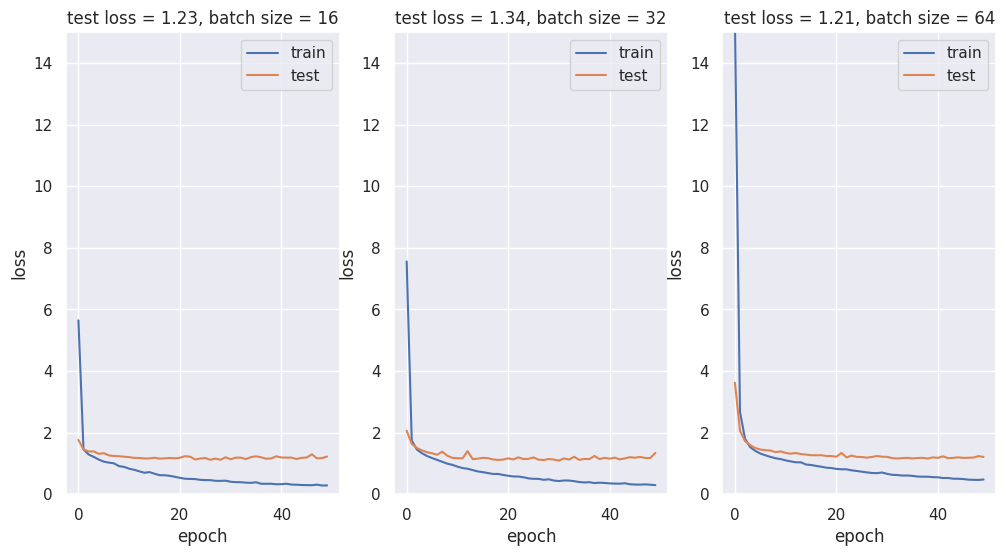

In [13]:
# Plot
fig = plt.figure(figsize=(12, 6))
sns.set(color_codes=True)
for index, batch in enumerate(batch_sizes):
    fig.add_subplot(1, len(batch_sizes), index + 1)
    model = neural_network_model(layer1_size, layer2_size)

    # Fit model on x_train, y_train data
    history = model.fit(
        np.array(list((x_train))).astype(float),
        y_train.values,
        batch_size=batch,
        validation_data=(np.array(list((x_test))).astype(float), y_test.values),
        verbose=0,
        epochs=nb_epoch,
    )
    plt.plot(history.history["loss"], label="train")
    plt.plot(history.history["val_loss"], label="test")
    plt.legend(["train", "test"], loc="upper right")
    plt.ylabel("loss")
    plt.xlabel("epoch")
    plt.ylim((0, 15))
    plt.title(
        f"test loss = {history.history['val_loss'][nb_epoch-1]:.2f}, " f"batch size = {batch}"
    )
plt.show()

From the loss plots above, a batch of size 16 seems to give the best performance.

A [_ModelCheckpoint callback_](https://keras.io/api/callbacks/) is used to save the best model/weights (in a checkpoint file) at some interval, so the model/weights can either be saved as it or be loaded later to continue the training from the state saved.

Now, we train the model with a batch size of 16 (because as seen from the figure above, it has the lowest test loss) and we save the weights that give the best perfomance in the file `best_weights.hdf5`.

In [17]:
# Save the trained model
filepath = "best.weights.h5"
checkpoint = ModelCheckpoint(
    str(filepath),
    monitor="loss",
    verbose=0,
    save_best_only=True,
    mode="min",
    save_weights_only=True,
)
callbacks_list = [checkpoint]

# Fit the model
model.fit(
    np.array(list((x_train))).astype(float),
    y_train.values,
    epochs=nb_epoch,
    batch_size=16,
    callbacks=callbacks_list,
    verbose=0,
)

### Evaluation & prediction on test set

The [evaluate()](https://keras.io/api/models/model_training_apis/#evaluate-method) method is used to check the performance of our model. It reports the **loss** (which is the mse in our case) as well as evaluation metrics (which are the **mse** and **mae**).

In [18]:
# Evalute the model
print(f"Evaluate the model on the test data")
scores = model.evaluate(np.array(list((x_test))), y_test.values, verbose=0)
print(f" loss: {scores[0]:.2f}")
print(f" mse (same as loss): {scores[1]:.2f}")
print(f" mae: {scores[2]:.2f}")

Evaluate the model on the test data
 loss: 1.27
 mse (same as loss): 1.27
 mae: 0.85


The mean absolute error on the test set is as below $1.0$ which given the range of pIC50 values is pretty low.

We now predict the pIC50 values on the test data.

In [19]:
# Predict pIC50 values on x_test data
y_pred = model.predict(np.array(list((x_test))))

# Print 5 first pIC50 predicted values
first_5_prediction = [print(f"{value[0]:.2f}") for value in y_pred[0:5]]

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
5.27
6.32
6.67
7.79
8.56


#### Scatter plot

To visualize the predictions, we plot the predicted vs. the true pIC50 values on the test set.

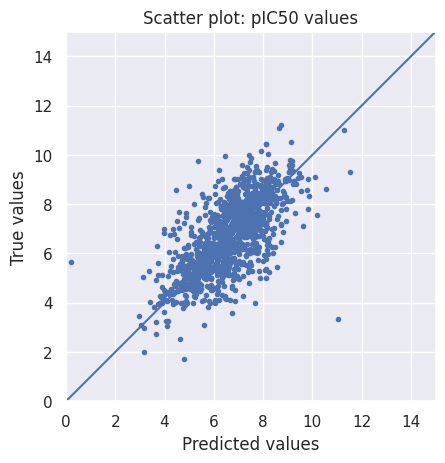

In [20]:
# Scatter plot
limits = 0, 15
fig, ax = plt.subplots()
ax.scatter(y_pred, y_test, marker=".")
lin = np.linspace(*limits, 100)
ax.plot(lin, lin)
ax.set_aspect("equal", adjustable="box")
ax.set_xlabel("Predicted values")
ax.set_ylabel("True values")
ax.set_title("Scatter plot: pIC50 values")
ax.set_xlim(limits)
ax.set_ylim(limits)
plt.show()

As we can see, there is a positive linear relation between the predicted and true values, but the fit is far from perfect.

### Prediction on external/unlabeled data

We use the trained neural network to predict the pIC50 values on the unlabeled compounds from the `test.csv`file.

In [23]:
!wget https://github.com/volkamerlab/teachopencadd/raw/refs/heads/master/teachopencadd/talktorials/T022_ligand_based_screening_neural_network/data/test.csv
# Load external/unlabeled data set
external_data = pd.read_csv("test.csv", index_col=0)
external_data = external_data.reset_index(drop=True)
external_data.head()
# NBVAL_CHECK_OUTPUT

--2024-09-20 11:08:49--  https://github.com/volkamerlab/teachopencadd/raw/refs/heads/master/teachopencadd/talktorials/T022_ligand_based_screening_neural_network/data/test.csv
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/volkamerlab/teachopencadd/refs/heads/master/teachopencadd/talktorials/T022_ligand_based_screening_neural_network/data/test.csv [following]
--2024-09-20 11:08:49--  https://raw.githubusercontent.com/volkamerlab/teachopencadd/refs/heads/master/teachopencadd/talktorials/T022_ligand_based_screening_neural_network/data/test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 33

,canonical_smiles
0,S(Cc1c([O-])c(OC)cc(/C=C(\C#N)/C(=O)N)c1)c1ccccc1
1,S=C(N)N1C(c2ccc(OC)cc2)CC(c2cc(C)c(C)cc2)=N1
2,Clc1c(O)cc(-c2nn(C(C)C)c3ncnc(N)c23)cc1
3,O=C(/C=C/CN1CC[NH+](C)CC1)N1Cc2sc3ncnc(N[C@H](...
4,S(=O)(=O)(NC(=O)Cn1c(C)ncc1[N+](=O)[O-])c1ccc(...


We use the same `smiles_to_fp` function and convert the SMILES strings into MACCS fingerprints.

In [24]:
# Convert SMILES strings to MACCS fingerprints
external_data["fingerprints_df"] = external_data["canonical_smiles"].apply(smiles_to_fp)

# Look at head
print("Shape of dataframe : ", external_data.shape)
external_data.head(3)
# NBVAL_CHECK_OUTPUT

Shape of dataframe :  (60, 2)


,canonical_smiles,fingerprints_df
0,S(Cc1c([O-])c(OC)cc(/C=C(\C#N)/C(=O)N)c1)c1ccccc1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,S=C(N)N1C(c2ccc(OC)cc2)CC(c2cc(C)c(C)cc2)=N1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,Clc1c(O)cc(-c2nn(C(C)C)c3ncnc(N)c23)cc1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


**Note**: For reproducibility of the results, we saved one model under `ANN_model.hdf5`, with the same architecture as above. Even though the model is the same, the weights that are saved from one simulation to another might differ due to the randomness in the _stochastic_ gradient algorithm. We load the ANN model weights with the [load_model()](https://keras.io/api/models/model_saving_apis/#loadmodel-function) function.

In [ ]:
# Load model
model = load_model(DATA / "ANN_model.hdf5", compile=False)

In [25]:
# Prediction on external/unlabeled data
predictions = model.predict(
    np.array(list((external_data["fingerprints_df"]))).astype(float), callbacks=callbacks_list
)

predicted_pIC50 = pd.DataFrame(predictions, columns=["predicted_pIC50"])
predicted_pIC50_df = external_data.join(predicted_pIC50)

predicted_pIC50_df.head(3)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


,canonical_smiles,fingerprints_df,predicted_pIC50
0,S(Cc1c([O-])c(OC)cc(/C=C(\C#N)/C(=O)N)c1)c1ccccc1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",5.684252
1,S=C(N)N1C(c2ccc(OC)cc2)CC(c2cc(C)c(C)cc2)=N1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",6.144324
2,Clc1c(O)cc(-c2nn(C(C)C)c3ncnc(N)c23)cc1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",5.524937


In [26]:
# Save the predicted values in a csv file in the data folder
predicted_pIC50_df.to_csv("predicted_pIC50_df.csv")

#### Select the top 3 compounds

We select the 3 compounds with the highest predicted pIC50 values, which could be further investigated as potential EGRF inhibitors.

In [27]:
# Select top 3 drugs
predicted_pIC50_df = pd.read_csv("predicted_pIC50_df.csv", index_col=0)
top3_drug = predicted_pIC50_df.nlargest(3, "predicted_pIC50")
top3_drug

,canonical_smiles,fingerprints_df,predicted_pIC50
18,Clc1c(F)ccc(NC=2N=CNC=3C=2C=C(OCCCCC=C=C)C(=O)...,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,8.273197
56,CC(C)CC[NH+](C1CCCC1)[C@]2(CSCCC2(C)C)CN,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,7.762533
53,c1cc(ccc1Nc2c(c(nc[nH+]2)NCCCn3cc[nH+]c3)N)I,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,7.744068


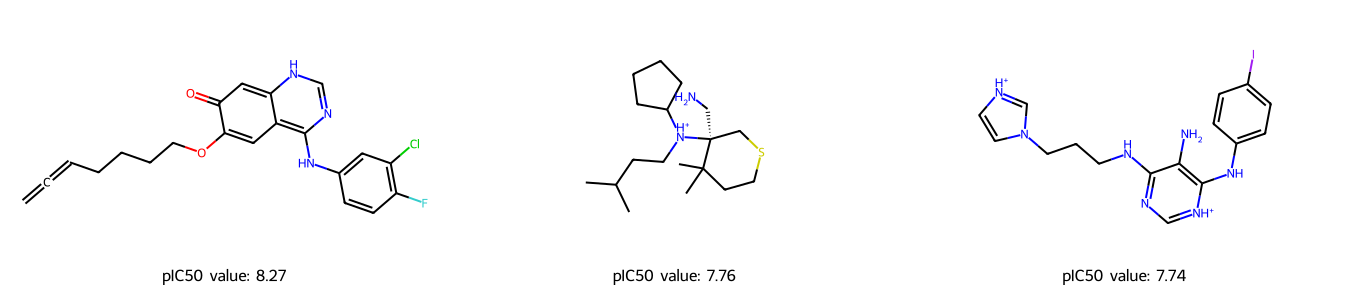

In [28]:
# Draw the drug molecules
highest_pIC50 = predicted_pIC50_df["canonical_smiles"][top3_drug.index]

mols_EGFR = [Chem.MolFromSmiles(smile) for smile in highest_pIC50]
pIC50_EGFR = top3_drug["predicted_pIC50"].tolist()
pIC50_values = [(f"pIC50 value: {value:.2f}") for value in pIC50_EGFR]

Draw.MolsToGridImage(mols_EGFR, molsPerRow=3, subImgSize=(450, 300), legends=pIC50_values)

## Discussion





From above we can see that there are some similarities between the three molecules. For example, they contain an aniline and pyrimidine group, as well as several aromatic carbon rings.

![Drug similarity](https://github.com/volkamerlab/teachopencadd/blob/master/teachopencadd/talktorials/T022_ligand_based_screening_neural_network/images/drugs_similarity.png?raw=1)

*Figure 5:* Representing similarities between selected top three drug molecules.

Since the external/unlabeled data is also taken from ChEMBL, we can double check if our predictions make sense. For example, the first compound with SMILES `Brc1cc(Nc2ncnc3nc(NC)ccc23)ccc1` and predicted pIC50 value of 8.48, has a high tested affinity against EGFR: a pIC50 value of 7.28, see entry [CHEMBL298637](https://www.ebi.ac.uk/chembl/compound_report_card/CHEMBL298637/).

Using the neural network for predictive modeling has some advantages: it is not as time consuming as laboratory experiments and it is much cheaper. It also hints at the kind of molecules that could be further investigated as potential EGFR inhibitors.

However, this model has some disadvantages: it highly depends on the chemical space of the training data, the parameter tuning as well as variable initialization which might affect the final results.
Such a model neither provides information about the side effects of compounds nor their potential toxicity.

## Quiz

- What other hyperparameters can be tuned to get better performance results?
- What other activation functions and metrics can be used while defining the model?
- Can you think of any other visualization method to plot the predictions and observed values?

-------
## Supplementary section

<details>
    
<summary> If you are interested in more details, please keep reading this section. We define other activation and forward propagation functions to get a better understanding of the underlying concepts. </summary>

**Activation functions**

Let's discuss some other activation functions and define them using python.

1) **Sigmoid function $\sigma$**: It takes the form: $$\boxed{\sigma(x)=\frac{1}{1+e^{−x}}}.$$

   -  The sigmoid curve looks like a *S*-shaped curve as shown in the figure below.
   - It has a "smooth gradient" which prevents jumps in the output values and it bounds the output values between 0 and 1.
   - It is recommended to be used only on the output layer so that the output can be interpreted as probabilities.
   - If you notice in the figure below, for $x$ values between -2.5 to 2.5, $y$ values are very steep, so any small change in values of $x$ in that region will cause value of $y$ to change significantly. It tends to bring the activations to either side of the curve.
   - However, for very high or very low values of $x$, there is almost no change in the $y$ values, causing a [**vanishing gradient**](https://towardsdatascience.com/the-vanishing-exploding-gradient-problem-in-deep-neural-networks-191358470c11) problem. This can cause the network to learn slowly or even refuse to learn further.

![sigmoid](https://github.com/volkamerlab/teachopencadd/blob/master/teachopencadd/talktorials/T022_ligand_based_screening_neural_network/images/sigmoid.png?raw=1)

*Figure 6:* Representation of the sigmoid function. Figure by Sakshi Misra.


    

2) **Hyperbolic Tangent function or tanh**:  It takes the form: $$\boxed{f(x)= tanh(x) = \frac{e^x -  e^{-x}}{e^x + e^{-x}}}.$$

   - It is non-linear as the sigmoid function and the output is bound between -1 and 1. Deciding between a sigmoid and a tanh depends upon on the problem at hand.
   - Similarly to the sigmoid, it can also suffer from the vanishing gradient problem.

![tanh](https://github.com/volkamerlab/teachopencadd/blob/master/teachopencadd/talktorials/T022_ligand_based_screening_neural_network/images/tanh.png?raw=1)

*Figure 7:* Representation of the hyperbolic tangent _tanh_ function. Figure by Sakshi Misra.


3) **Leaky Rectified Linear Unit**: it takes the form: $$\boxed{f(x)= \max\{ α ∗ x,x\}}.$$

   - This is a variation of ReLU which has a small positive slope in the negative area.
   - The range of Leaky ReLU is $(-\infty, \infty)$.
   - It overcomes the zero gradient issue from ReLU and assigns $\alpha$ which is a small value for $x≤0$.

![leaky](https://github.com/volkamerlab/teachopencadd/blob/master/teachopencadd/talktorials/T022_ligand_based_screening_neural_network/images/leaky.png?raw=1)

*Figure 8:* Representation of the "Leaky ReLU" function. Figure by Sakshi Misra.

Which activation function do we choose?

It mainly depends on the type of problem you are trying to solve and the computation cost. There are many activation functions, but the general idea remains the same. Please refer to the article by H. N. Mhaskar, [How to Choose an Activation Function](https://papers.nips.cc/paper/1993/file/51ef186e18dc00c2d31982567235c559-Paper.pdf) for more details.

Now we define in python the activation functions discussed above and plot them.


    
```python
# Define activation functions that can be used in forward propagation
def sigmoid(input_array):
    """
    Computes the sigmoid of the input element-wise.

    Parameters
    ----------
    input_array : array
             Input values.

    Returns
    -------
    activation_function : array
             Post activation output.
    input_array : array
             Input values.
    """
    activation_function = 1 / (1 + np.exp(-input_array))

    return activation_function, input_array


def tanh(x):
    """
    Computes the hyperbolic tagent of the input element-wise.

    Parameters
    ----------
    input_array : array
             Input values.

    Returns
    -------
    activation_function : array
             Post activation output.
    input_array : array
             Input values.
    """
    activation_function = np.tanh(input_array)

    return activation_function, input_array


def relu(input_array):
    """
    Computes the Rectified Linear Unit (ReLU) element-wise.

    Parameters
    ----------
    input_array : array
             Input values.
    Returns
    -------
    activation_function : array
             Post activation output.
    input_array : array
             Input values.
    """
    activation_function = np.maximum(0, input_array)

    return activation_function, input_array


def leaky_relu(input_array):
    """
    Computes Leaky Rectified Linear Unit element-wise.

    Parameters
    ----------
    input_array : array
             Input values.

    Returns
    -------
    activation_function : array
             Post activation output.
    input_array : array
             Input values.
    """
    activation_function = np.maximum(0.1 * input_array, input_array)

    return activation_function, input_array

```



We can also plot all the activation functions using the `matplotlib` library as shown below.



```python
# Plot the four activation functions
input_array = np.linspace(-10, 10, 100)

# Computes post-activation outputs
activation_sigmoid, input_array = sigmoid(input_array)
activation_tanh, input_array = tanh(input_array)
activation_relu, input_array = relu(input_array)
activation_leaky_relu, input_array = leaky_relu(input_array)

# Plot sigmoid function
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(input_array, activation_sigmoid, 'b')
plt.axvline(x=0, color='gray', linestyle='--')
plt.axhline(y=0, color='gray', linestyle='--')
plt.xlabel("input(x)")
plt.ylabel(r"$\frac{1}{1 + e^{-x}}$")
plt.title("Sigmoid Function", fontsize=16)

# Plot tanh function
plt.subplot(2, 2, 2)
plt.plot(input_array, activation_tanh, 'b')
plt.axvline(x=0, color='gray', linestyle='--')
plt.axhline(y=0, color='gray', linestyle='--')
plt.xlabel("input(x)")
plt.ylabel(r"$\frac{e^x - e^{-x}}{e^x + e^{-x}}$")
plt.title("Hyperbolic Tangent Function", fontsize=16)

# plot relu function
plt.subplot(2, 2, 3)
plt.plot(input_array, activation_relu, 'b')
plt.axvline(x=0, color='gray', linestyle='--')
plt.axhline(y=0, color='gray', linestyle='--')
plt.xlabel("input(x)")
plt.ylabel(r"$max\{0, x\}$")
plt.title("ReLU Function", fontsize=16)

# plot leaky relu function
plt.subplot(2, 2, 4)
plt.plot(input_array, activation_leaky_relu, 'b')
plt.axvline(x=0, color='gray', linestyle='--')
plt.axhline(y=0, color='gray', linestyle='--')
plt.xlabel("input(x)")
plt.ylabel(r"$max\{0.1x, x\}$")
plt.title("Leaky ReLU Function", fontsize=16)
plt.tight_layout()
```

<br />

**Forward Propagation**



Now, we will define forward propagation functions using classes, to better understand the forward propagation concept.

First, we define a class named `Layer_Dense`. It has two properties, ``weights`` and ``biases``. We randomly assign their values and define a function named `forward_pass` which calculates the *dot product* of the input values and weights and adds them to the bias values.
Since we know that the activation function is applied on every neuron, we create another class named `Activation_Function` using `ReLU` as an example.

After defining classes and their attributes, we create an object from both classes and call the functions on our dataset. We can then print the output values which are the predicted pIC50 values.

**Note:** The predicted values will differ in every run because the weights are randomly assigned.



```python
# create forward pass function with one hidden layer
class Layer_Dense:
    """
    A class to represent a neural network
    
    '''
    Attributes
    ----------
    n_inputs : int
        Number of neurons in input layer
    n_neurons : int
        Number of neurons in hidden layer

    Method
    ------
    forward_pass(inputs):
        Computes the forward pass of a neural network.
    """

    def __init__(self, n_inputs, n_neurons):
        """
        Constructs all the necessary attributes.

        Parameters
        ----------
        n_inputs : int
            Number of neurons in input layer
        n_neurons : int
            Number of neurons in hidden layer

        """
        self.weights = 0.10 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
        
    def forward_pass(self, inputs):
        """
        Compute forward pass.

        Parameters
        ----------
        input : int
            Input neurons.

        Returns
        -------
        None
        
        """
        self.output = np.dot(inputs, self.weights) + self.biases


class Activation_Function:
    """
    A class to represent an activation function

    Method
    ------
    ReLU(inputs):
        Apply the ReLU activation function.
    """
    def ReLU(self, inputs):
        """
        Apply the activation function to the neurons.

        Parameters
        ----------
        input : int
            Input neurons.

        Returns
        -------
        None
        
        """
        self.output = np.maximum(0, inputs)

     
# object
layer1 = Layer_Dense(167, 50)
layer2 = Layer_Dense(50, 1)
activation1 = Activation_Function()
activation2 = Activation_Function()

# function calling
layer1.forward_pass(np.array(list((chembl_df['fingerprints_df']))))
layer2.forward_pass(layer1.output)
activation1.ReLU(layer1.output)
activation2.ReLU(layer2.output)

print(activation2.output)
```


</details>